# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set up lists to hold reponse info
citys = []
lat = []
temp = []
humidity = []
cloudiness = []
windspeed = []

url = "http://api.openweathermap.org/data/2.5/weather?"

# Get weather data
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
    try:
        citys.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        print("processing city_name:", weather_response['name'], ", city_id:", weather_response['id'])
    except:
        print("Oops! ",weather_response['message']," Skipping...")  


processing city_name: San Andres , city_id: 1690438
processing city_name: Mufulira , city_id: 905395
processing city_name: Aklavik , city_id: 5882953
processing city_name: Vaini , city_id: 1273574
processing city_name: Rikitea , city_id: 4030556
processing city_name: Pimentel , city_id: 3389609
processing city_name: Manokwari , city_id: 1636308
Oops!  city not found  Skipping...
processing city_name: Touros , city_id: 3386213
processing city_name: Cape Town , city_id: 3369157
Oops!  city not found  Skipping...
Oops!  city not found  Skipping...
processing city_name: Dikson , city_id: 1507390
processing city_name: Qaanaaq , city_id: 3831208
processing city_name: Atuona , city_id: 4020109
processing city_name: Barrow , city_id: 3833859
processing city_name: Castro , city_id: 3896218
Oops!  city not found  Skipping...
processing city_name: Ciudad Bolivar , city_id: 3645532
processing city_name: Maldonado , city_id: 3441894
processing city_name: Kloulklubed , city_id: 7671223
processing ci

processing city_name: Kahului , city_id: 5847411
processing city_name: Broken Hill , city_id: 2173911
processing city_name: Batagay-Alyta , city_id: 2027042
processing city_name: Challans , city_id: 3027513
processing city_name: Lompoc , city_id: 5367788
processing city_name: Honiara , city_id: 2108502
processing city_name: Muzaffarabad , city_id: 1169607
processing city_name: Sur , city_id: 286245
processing city_name: Victoria , city_id: 1733782
processing city_name: Yabelo , city_id: 326036
processing city_name: Aguascalientes , city_id: 4019233
processing city_name: Copiapo , city_id: 3893656
processing city_name: Georgetown , city_id: 3378644
Oops!  city not found  Skipping...
processing city_name: Beinamar , city_id: 2435708
processing city_name: Shimoda , city_id: 1852357
processing city_name: Chernyshevskiy , city_id: 2025456
processing city_name: Arlit , city_id: 2447513
processing city_name: Ancud , city_id: 3899695
processing city_name: Paamiut , city_id: 3421193
Oops!  city

processing city_name: Kuala Selangor , city_id: 1732891
processing city_name: Lere , city_id: 2428042
processing city_name: Broome , city_id: 2656067
processing city_name: Prince Rupert , city_id: 6113406
processing city_name: Mikuni , city_id: 1857260
processing city_name: Namatanai , city_id: 2090021
processing city_name: Whitehorse , city_id: 6180550
processing city_name: Jacmel , city_id: 3723779
Oops!  city not found  Skipping...
processing city_name: Novaya Ladoga , city_id: 519630
processing city_name: Itarema , city_id: 3393692
processing city_name: Candido de Abreu , city_id: 3467545
processing city_name: High Level , city_id: 5975004
processing city_name: Torbay , city_id: 6167817
Oops!  city not found  Skipping...
processing city_name: Sechura , city_id: 3691954
processing city_name: Ishigaki , city_id: 1861416
processing city_name: Margate , city_id: 2158744
processing city_name: Muli , city_id: 7304020
processing city_name: Cortez , city_id: 5418104
processing city_name: M

processing city_name: Muros , city_id: 3115824
Oops!  city not found  Skipping...
processing city_name: Roebourne , city_id: 2062276
processing city_name: Madera , city_id: 5369568
processing city_name: Colares , city_id: 2269142
processing city_name: Fuerte Olimpo , city_id: 3438102
processing city_name: Carnduff , city_id: 5917349
processing city_name: Port Elizabeth , city_id: 4501427
Oops!  city not found  Skipping...
processing city_name: Rio Grande da Serra , city_id: 3451134
processing city_name: Inongo , city_id: 2315417
processing city_name: La Asuncion , city_id: 3856548
processing city_name: Venezuela , city_id: 3534432
Oops!  Internal error: 500001  Skipping...
processing city_name: Batagay , city_id: 2027044
processing city_name: Jumla , city_id: 1283285
processing city_name: Brae , city_id: 2654970
processing city_name: Moranbah , city_id: 6533368
Oops!  city not found  Skipping...
processing city_name: Petropavlovskoye , city_id: 2127154
processing city_name: Roswell , c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "city": citys,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp,humidity,cloudiness,windspeed
0,San Andres,13.32,298.90,86,100,1.53
1,Mufulira,-12.55,299.50,21,0,3.64
2,Aklavik,68.22,283.15,57,20,4.10
3,Vaini,15.34,298.00,78,90,5.10
4,Rikitea,-23.12,296.80,82,61,3.11


In [7]:
weather_data.to_html('table.html')

In [8]:
weather_data.count()

city          532
lat           532
temp          532
humidity      532
cloudiness    532
windspeed     532
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

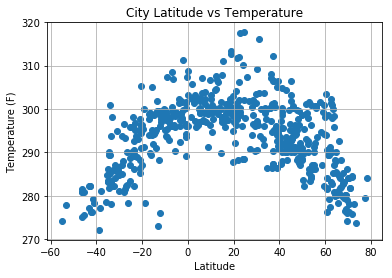

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

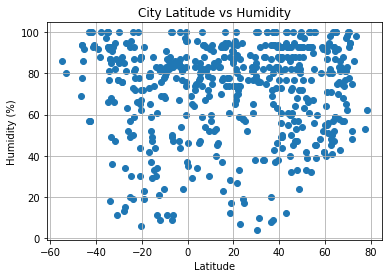

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

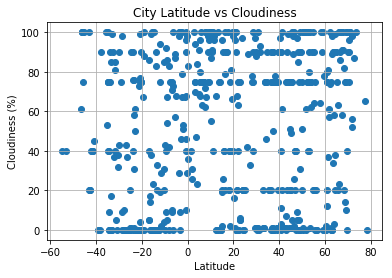

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

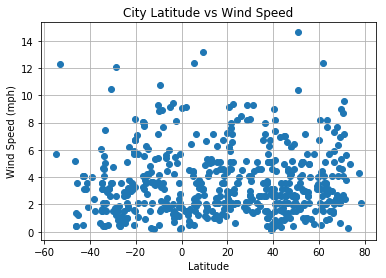

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()

#### Save Data to csv file

In [55]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

#### Observable Trends

In [ ]:
# 1. The temp graph has a strong concave shape that peaks in and around 0-20 latitude providing strong support that tempature 
#    gets hotter the closer you get to the equator
# 2. There is no strong correlation between humidity and latitude, cloudiness and latitude or wind speed and latitude.
# 3. Most cities appear to have a humidity between 60 and 100%
